# **Задача классификации**

In [310]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных

# 0. Описание задачи

Обладая некоторой общей информацией о пациенте (для получения этой информации не нужно проводить серьезные медицинские исследования), нужно спрогнозировать риск сердечно-сосудистых заболеваний.

# 1. Загрузка данных

In [311]:
data_raw = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

Количество объектов в датасете:

In [312]:
data_raw.shape[0]

253680

Количество признаков у каждого объекта:

In [313]:
data_raw.shape[1]

22

Первые 15 объектов:

In [314]:
data_raw.head(15)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,2.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [315]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Мы видим, что столбцы (признаки) имеют имена

- `HeartDiseaseorAttack` - ишемическая болезнь сердца (ИБС) или инфаркт миокарда (ИМ), 1 - есть, 0 - нет
- `HighBP` - высокое кровяное давление, 1 - есть, 0 нет
- `HighChol` - повышенный уровень холестерина, 1 - есть, 0 - нет
- `CholCheck` - проверка уровня холестерина за последние 5 лет, 1 - была, 0 - нет
- `BMI` - индекс массы тела
- `Smoker` - ответ на вопрос: Выкурили ли вы хотя бы 100 сигарет за всю свою жизнь?, 1 - да, 0 - нет
- `Stroke` - инсульт, 1 - был, 0 - нет
- `Diabetes` - диабет, 2 - диабет, 1 - преддиабет, 0 - нет диабета
- `PhysActivity` - физическая активность за последние 30 дней, не включая работу, 1 - была, 0 - нет
- `Fruits` - употребление фруктов 1 и более раз за день, 1 - да, 0 - нет
- `Veggies` - употребление овощей 1 и более раз за день, 1 - да, 0 - нет
- `HvyAlcoholConsump` - сильно пьющие (взрослые мужчины, выпивающие более 14 напитков в неделю, и взрослые женщины, выпивающие более 7 напитков в неделю), 1 - да, 0 - нет
- `AnyHealthcare` - наличие любого вида медицинского обслуживания, включая медицинскую страховку и т.д., 1 - да, 0 -нет
- `NoDocbcCost` - ответ на вопрос: Было ли за последние 12 месяцев время, когда вам нужно было обратиться к врачу, но вы не могли этого сделать из-за дороговизны?, 1 - да, 0 - нет
- `GenHlth` - здоровье пациента, по его мнению, 1 - отличное, 2 - очень хорошее, 3 - хорошее, 4 - удовлетворительное, 5 - плохое
- `MentHlth` - ответ на вопрос: Сколько дней в течение последних 30 дней ваше психическое здоровье было плохим?(психическое здоровье включает стресс, депрессию и проблемы с эмоциями и т. д.), от 0 до 30 дней
- `PhysHlth` - ответ на вопрос: Сколько дней в течение последних 30 дней ваше физическое здоровье было плохим?(физическое здоровье включает в себя физические заболевания и травмы и т. д.), от 0 до 30 дней
- `DiffWalk` - ответ на вопрос: Испытываете ли вы серьезные трудности при ходьбе или подъеме по лестнице?, 1 - да, 0 - нет
- `Sex` - пол, 1 - мужской, 0 - женский
- `Age` - возраст, 1 - от 18 до 24, 2 - от 25 до 29, 3 - от 30 до 34, 4 - от 35 до 39, 5 - от 40 до 44, 6 - от 45 до 49, 7 - от 50 до 54, 8 - от 55 до 59, 9 - от 60 до 64, 10 - от 65 до 69, 11 - от 70 до 74, 12 - от 75 до 79, 13 - от 80 и старше
- `Education` - образование, 1 - никогда не посещал школу или только детский сад, 2 - 1-8 классы (начальная школа), 3 - 9-11 классы (старшая школа), 4 - 12 класс или GED (выпускник старшей школы), 5 - Колледж от 1 года до 3 лет (некоторые колледжи или техническая школа), 6 - Колледж 4 года или более (выпускник колледжа)
- `Income` - доходы, 1 - менее 10 000 долларов США, 2 - менее 15 000 долларов США (от 10 000 до менее 15 000 долларов США), 3 - менее 20 000 долларов США (от 15 000 до менее 20 000 долларов США), 4 - менее 25 000 долларов США (от 20 000 до менее 25 000 долларов США), 5 менее 35 000 долларов США (от 25 000 до менее 35 000 долларов США), 6 - менее 50 000 долларов США (от 35 000 до менее 50 000 долларов США), 7 - менее 75 000 долларов США (от 50 000 до менее 75 000 долларов США), 8 - 75 000 долларов или больше

Все признаки, за исключением `BMI`, `GenHlth`, `MentHelt`, `Income`, категориальные. `BMI`, `GenHlth`, `MentHelt`, `Income` - количественные.

In [316]:
data_raw['HeartDiseaseorAttack'] = data_raw['HeartDiseaseorAttack'].astype('category')

In [317]:
data_raw['HighBP'] = data_raw['HighBP'].astype('category')

In [318]:
data_raw['HighChol'] = data_raw['HighChol'].astype('category')

In [319]:
data_raw['CholCheck'] = data_raw['CholCheck'].astype('category')

In [320]:
data_raw['Smoker'] = data_raw['Smoker'].astype('category')

In [321]:
data_raw['Stroke'] = data_raw['Stroke'].astype('category')

In [322]:
data_raw['Diabetes'] = data_raw['Diabetes'].astype('category')

In [323]:
data_raw['PhysActivity'] = data_raw['PhysActivity'].astype('category')

In [324]:
data_raw['Fruits'] = data_raw['Fruits'].astype('category')

In [325]:
data_raw['Veggies'] = data_raw['Veggies'].astype('category')

In [326]:
data_raw['HvyAlcoholConsump'] = data_raw['HvyAlcoholConsump'].astype('category')

In [327]:
data_raw['AnyHealthcare'] = data_raw['AnyHealthcare'].astype('category')

In [328]:
data_raw['NoDocbcCost'] = data_raw['NoDocbcCost'].astype('category')

In [329]:
data_raw['HvyAlcoholConsump'] = data_raw['HvyAlcoholConsump'].astype('category')

In [330]:
data_raw['GenHlth'] = data_raw['GenHlth'].astype('category')

In [331]:
data_raw['DiffWalk'] = data_raw['DiffWalk'].astype('category')

In [332]:
data_raw['Sex'] = data_raw['Sex'].astype('category')

In [333]:
data_raw['Age'] = data_raw['Age'].astype('category')

In [334]:
data_raw['Education'] = data_raw['Education'].astype('category')

In [335]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   HeartDiseaseorAttack  253680 non-null  category
 1   HighBP                253680 non-null  category
 2   HighChol              253680 non-null  category
 3   CholCheck             253680 non-null  category
 4   BMI                   253680 non-null  float64 
 5   Smoker                253680 non-null  category
 6   Stroke                253680 non-null  category
 7   Diabetes              253680 non-null  category
 8   PhysActivity          253680 non-null  category
 9   Fruits                253680 non-null  category
 10  Veggies               253680 non-null  category
 11  HvyAlcoholConsump     253680 non-null  category
 12  AnyHealthcare         253680 non-null  category
 13  NoDocbcCost           253680 non-null  category
 14  GenHlth               253680 non-nul

## 2. Визуализация данных и вычисление основных характеристик (среднее, разброс, корреляционную матрицу и т.д.). Интерпретация полученных результатов.

Все диаграммы рассеивания для количественных признаков:

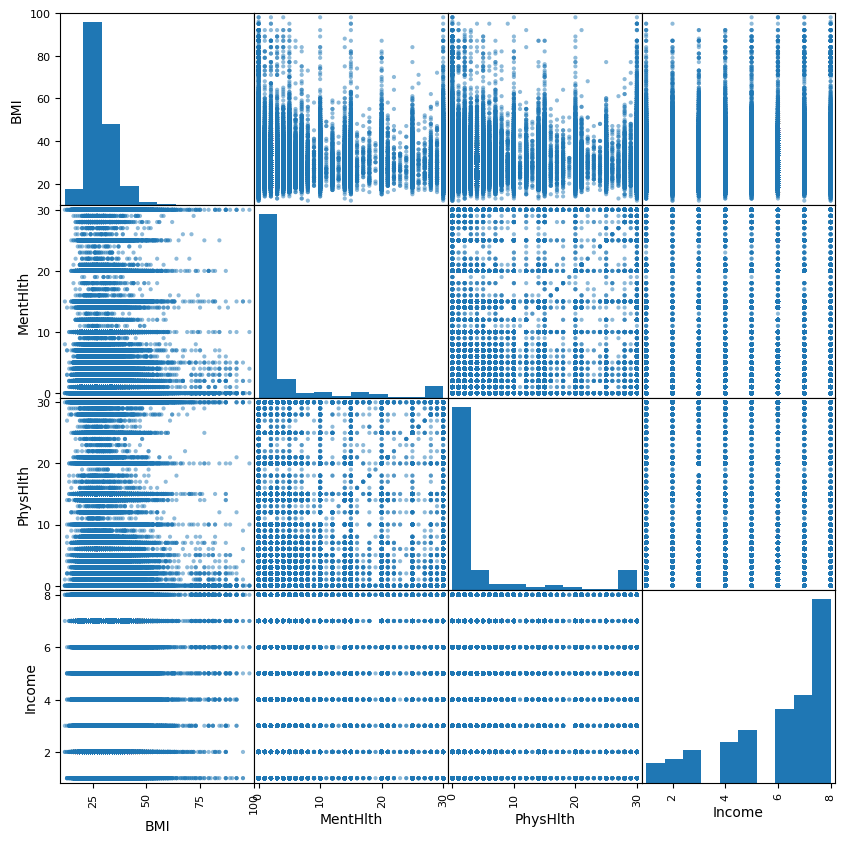

In [336]:
pd.plotting.scatter_matrix(data_raw, figsize = (10, 10))
pass

Борьба с выбросами

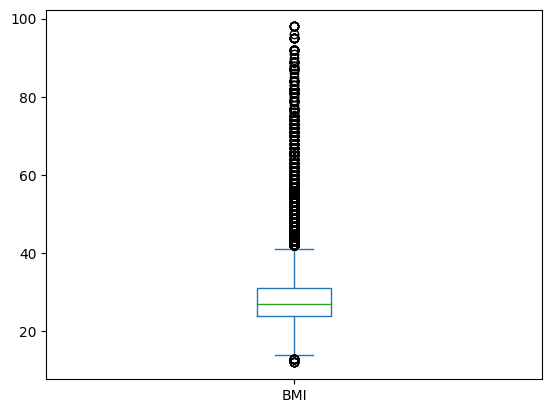

In [337]:
data_raw['BMI'].plot(kind='box')
pass

In [338]:
data_raw['BMI'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    17.0
0.010    18.0
0.050    20.0
0.100    22.0
0.500    27.0
0.900    36.0
0.950    40.0
0.990    50.0
0.995    55.0
Name: BMI, dtype: float64

Мы видим, что $99\%$ всех значений признака `'BMI'` находится в диапазоне от $17$ до $55$ (это значения квантилей, соответствующих уровням $0.005$ и $0.995$ соответственно)

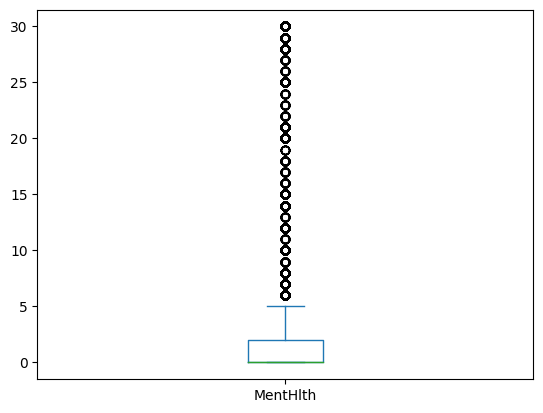

In [339]:
data_raw['MentHlth'].plot(kind='box')
pass

In [340]:
data_raw['MentHlth'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     0.0
0.900    10.0
0.950    26.0
0.990    30.0
0.995    30.0
Name: MentHlth, dtype: float64

Мы видим, значения квантилей уровней $0.005$ и $0.995$ соответствуют началу и концу диапазона значений признака `'MentHlth'`. Выбросов нет  

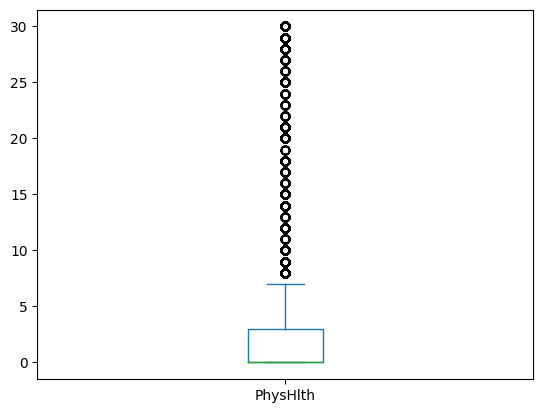

In [341]:
data_raw['PhysHlth'].plot(kind='box')
pass

In [342]:
data_raw['PhysHlth'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005     0.0
0.010     0.0
0.050     0.0
0.100     0.0
0.500     0.0
0.900    20.0
0.950    30.0
0.990    30.0
0.995    30.0
Name: PhysHlth, dtype: float64

Мы видим, значения квантилей уровней $0.005$ и $0.995$ соответствуют началу и концу диапазона значений признака `'PhysHlth'`. Выбросов нет 

Удалим все строки таблицы, в которых значения `'BMI'` выходят за пределы квантилей $0.005$, $0.995$.

In [343]:
rows_to_drop = data_raw[
    (data_raw['BMI'] < data_raw['BMI'].quantile(0.005)) | (data_raw['BMI'] > data_raw['BMI'].quantile(0.995))].index
data = data_raw.drop(rows_to_drop)
data.shape

(251944, 22)

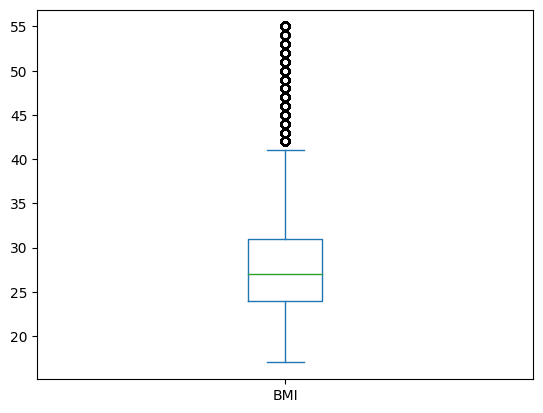

In [344]:
data['BMI'].plot(kind='box')
pass

In [345]:
data.describe()

,BMI,MentHlth,PhysHlth,Income
count,251944.000000,251944.000000,251944.000000,251944.000000
mean,28.213833,3.167775,4.208360,6.060839
std,5.895330,7.390597,8.681304,2.067011
min,17.000000,0.000000,0.000000,1.000000
25%,24.000000,0.000000,0.000000,5.000000
50%,27.000000,0.000000,0.000000,7.000000
75%,31.000000,2.000000,3.000000,8.000000
max,55.000000,30.000000,30.000000,8.000000


In [346]:
data.describe(include=['category'])

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,DiffWalk,Sex,Age,Education
count,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0,251944.0
unique,2.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,5.0,2.0,2.0,13.0,6.0
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,9.0,6.0
freq,228249.0,143991.0,145023.0,242535.0,140329.0,241758.0,212361.0,190923.0,159958.0,204532.0,237752.0,239660.0,230820.0,88733.0,209977.0,140855.0,33037.0,106748.0


Все диаграммы рассеивания для количественных признаков:

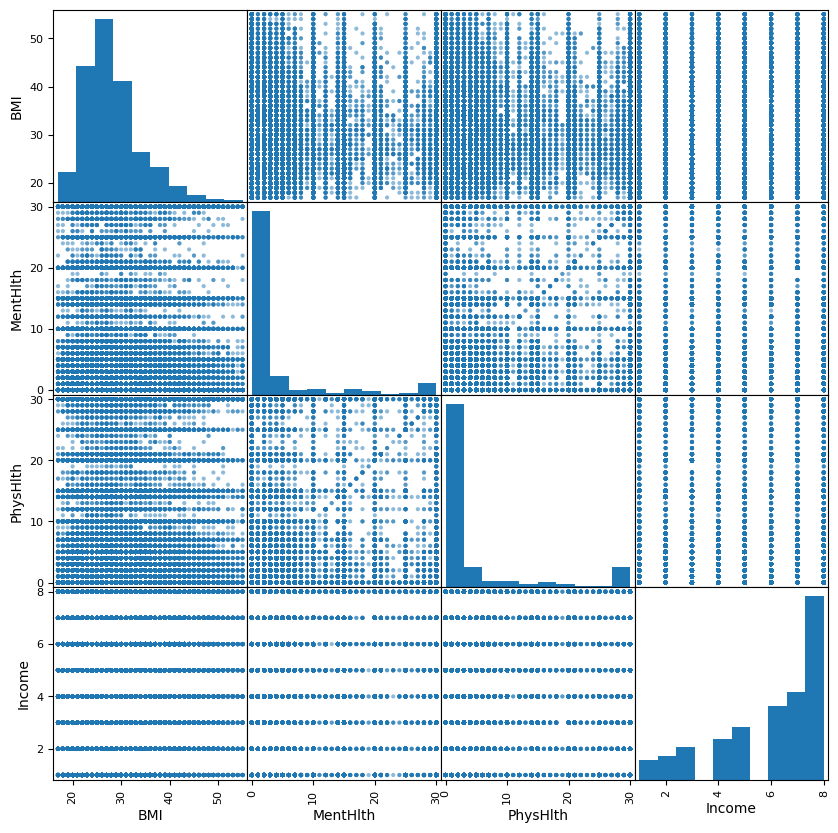

In [347]:
pd.plotting.scatter_matrix(data, figsize = (10, 10))
pass

Из диаграммы рассеивания можно сделать вывод, что у людей с высоким индексом  массы тела больше проблем с психическим и физическим здоровьем

Посмотреть, сколько раз некоторые номинальные переменные принимают то или иное значение

In [348]:
data['HeartDiseaseorAttack'].value_counts() 

0.0    228249
1.0     23695
Name: HeartDiseaseorAttack, dtype: int64

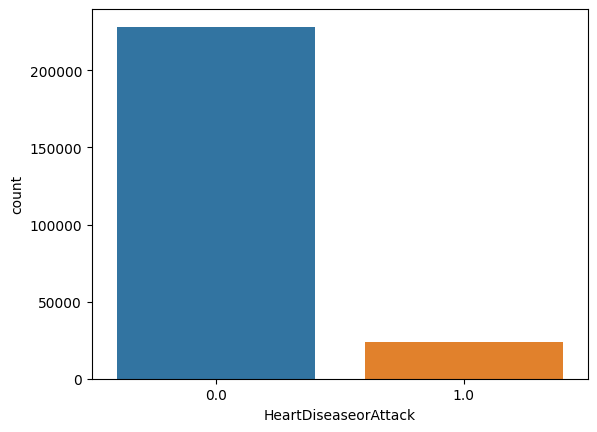

In [349]:
sns.countplot(x='HeartDiseaseorAttack', data=data)
pass

In [350]:
data['HighChol'].value_counts()

0.0    145023
1.0    106921
Name: HighChol, dtype: int64

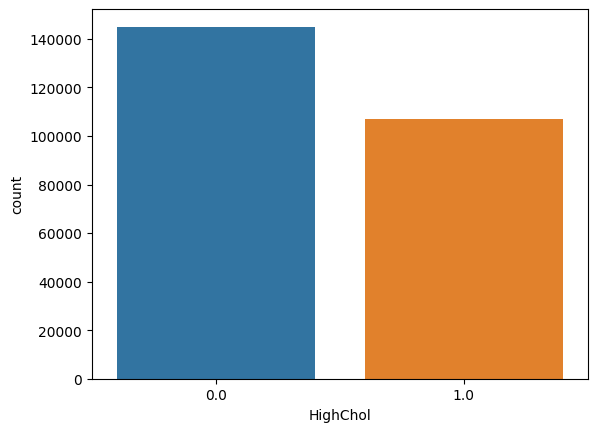

In [351]:
sns.countplot(x='HighChol', data=data)
pass

In [352]:
data['Diabetes'].value_counts()

0.0    212361
2.0     34987
1.0      4596
Name: Diabetes, dtype: int64

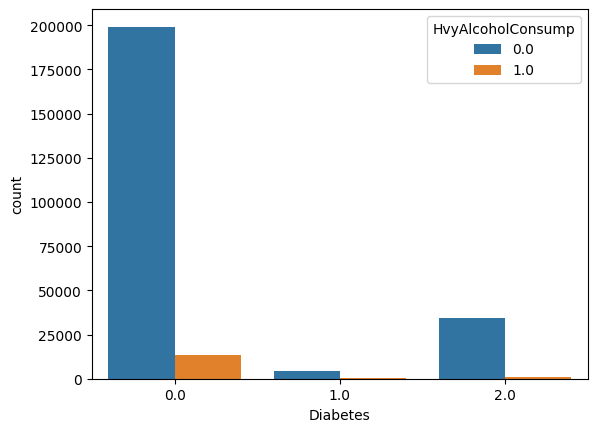

In [353]:
sns.countplot(x='Diabetes', hue='HvyAlcoholConsump', data=data)
pass

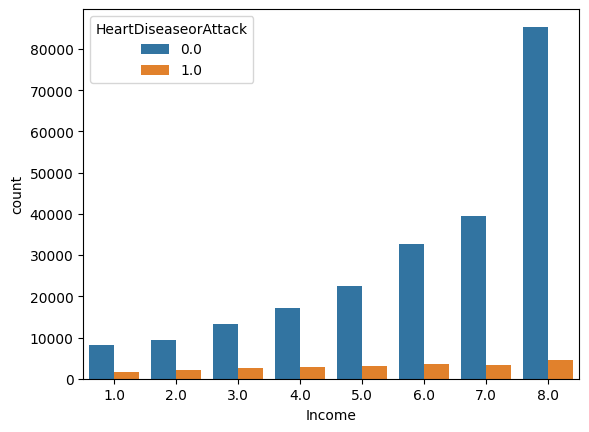

In [354]:
sns.countplot(x='Income', hue='HeartDiseaseorAttack', data=data)
pass

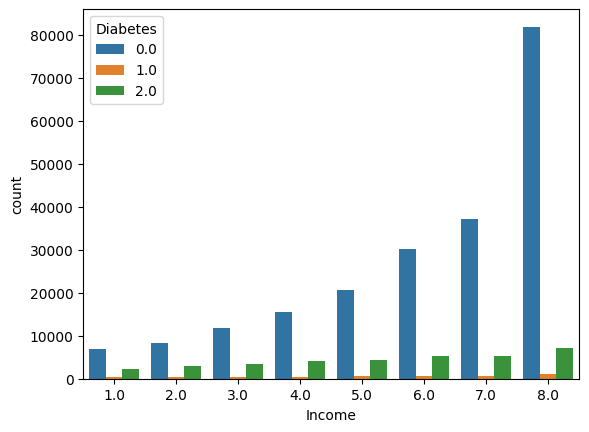

In [355]:
sns.countplot(x='Income', hue='Diabetes', data=data)
pass

In [356]:
data['Sex'].value_counts()

0.0    140855
1.0    111089
Name: Sex, dtype: int64

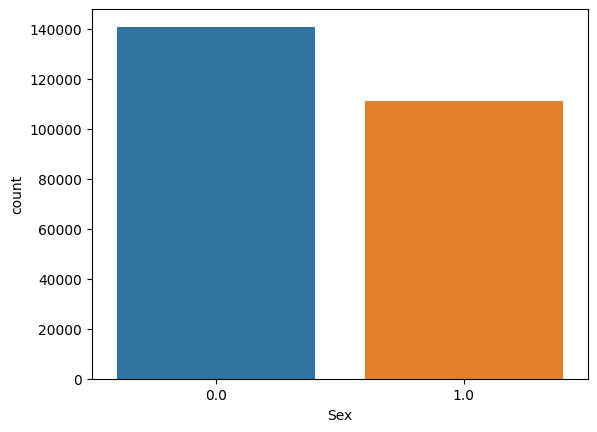

In [357]:
sns.countplot(x='Sex', data=data)
pass

*Ящик с усами* (*бокс-диаграмма*) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

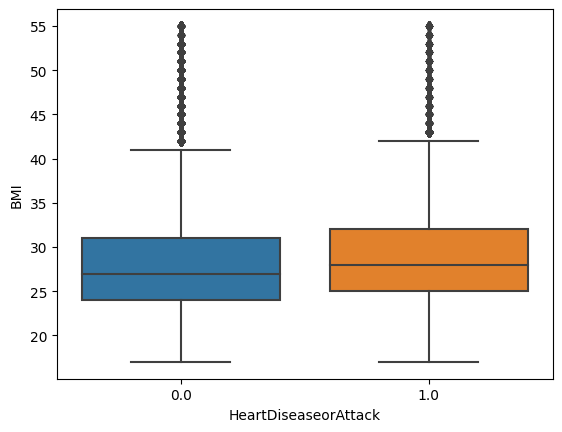

In [358]:
sns.boxplot(x="HeartDiseaseorAttack", y="BMI", data=data)
pass

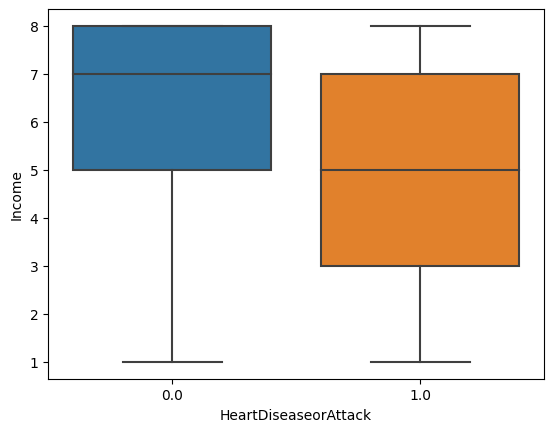

In [359]:
sns.boxplot(x="HeartDiseaseorAttack", y="Income", data=data)
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [360]:
corr_mat = data.corr(numeric_only = True)
corr_mat

,BMI,MentHlth,PhysHlth,Income
BMI,1.000000,0.088328,0.125225,-0.105311
MentHlth,0.088328,1.000000,0.352034,-0.208186
PhysHlth,0.125225,0.352034,1.000000,-0.264608
Income,-0.105311,-0.208186,-0.264608,1.000000


Удобно использовать визуальный образ этой матрицы:

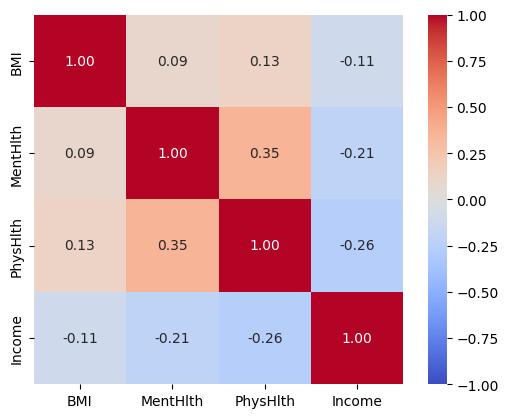

In [361]:
sns.heatmap(corr_mat, square=True, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [362]:
corr_mat > 0.5

,BMI,MentHlth,PhysHlth,Income
BMI,True,False,False,False
MentHlth,False,True,False,False
PhysHlth,False,False,True,False
Income,False,False,False,True


In [363]:
np.triu(corr_mat, k=1)

array([[ 0.        ,  0.08832835,  0.12522476, -0.10531093],
       [ 0.        ,  0.        ,  0.35203376, -0.20818643],
       [ 0.        ,  0.        ,  0.        , -0.26460801],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [364]:
corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack()

Series([], dtype: float64)

In [365]:
corr_mat.where(np.triu(np.abs(corr_mat) > 0.5, k=1)).stack().sort_values(ascending=False)

Series([], dtype: float64)

Вывод: какя-либо серьезная корреляция между количественными признаками отсутствует

## 3. Обработка пропущенных значений

Пропущенные значения в таблице представлены значениями `np.nan`. 
Посмотрим, сколько пропущенных значений в каждом столбце матрицы:
`na` - not available

In [366]:
data.isna().sum()  

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Пропущенных значений нет, их обработка не требуется

## 4. Обработка категориальных признаков

Обработка бинарных категориальных признаков не требуется, т. к. в датасете эти признаки  уже заданы числовыми значениями 0 и 1. К небинарным категориальным признакам применим метод *бинаризации*:

In [368]:
data_nonbinary = pd.get_dummies(data[['Diabetes', 'Age', 'Education']])
print(data_nonbinary.columns)

Index(['Diabetes_0.0', 'Diabetes_1.0', 'Diabetes_2.0', 'Age_1.0', 'Age_2.0',
       'Age_3.0', 'Age_4.0', 'Age_5.0', 'Age_6.0', 'Age_7.0', 'Age_8.0',
       'Age_9.0', 'Age_10.0', 'Age_11.0', 'Age_12.0', 'Age_13.0',
       'Education_1.0', 'Education_2.0', 'Education_3.0', 'Education_4.0',
       'Education_5.0', 'Education_6.0'],
      dtype='object')


In [369]:
data = pd.concat((data, data_nonbinary), axis=1).drop(['Diabetes', 'Age', 'Education'], axis=1)

## 5. Проведение нормализации

Многие алгоритмы машинного обучения чувствительны к масштабированию данных. К таким алгоритмам, например, относится метод ближайших соседей, машина опорных векторов и др.

В этом случае количественные признаки полезно нормализовать. Это можно делать разными способами. Например, каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:

In [370]:
data_numerical = data[['BMI', 'MentHlth', 'PhysHlth', 'Income']]
data_numerical.describe()

,BMI,MentHlth,PhysHlth,Income
count,251944.000000,251944.000000,251944.000000,251944.000000
mean,28.213833,3.167775,4.208360,6.060839
std,5.895330,7.390597,8.681304,2.067011
min,17.000000,0.000000,0.000000,1.000000
25%,24.000000,0.000000,0.000000,5.000000
50%,27.000000,0.000000,0.000000,7.000000
75%,31.000000,2.000000,3.000000,8.000000
max,55.000000,30.000000,30.000000,8.000000


In [371]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [372]:
data_numerical.describe()

,BMI,MentHlth,PhysHlth,Income
count,2.519440e+05,2.519440e+05,2.519440e+05,2.519440e+05
mean,1.238650e-16,5.866101e-17,-5.189243e-17,-2.526936e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.902155e+00,-4.286224e-01,-4.847612e-01,-2.448385e+00
25%,-7.147748e-01,-4.286224e-01,-4.847612e-01,-5.132236e-01
50%,-2.058974e-01,-4.286224e-01,-4.847612e-01,4.543570e-01
75%,4.726057e-01,-1.580083e-01,-1.391910e-01,9.381473e-01
max,4.543625e+00,3.630590e+00,2.970941e+00,9.381473e-01


In [373]:
data.drop(['BMI', 'MentHlth', 'PhysHlth', 'Income'], axis=1)
data = pd.concat((data, data_numerical), axis=1)

## 6. Разбиение данных на обучающую и тестовую выборки

In [374]:
X = data_raw.drop(['HeartDiseaseorAttack'], axis=1)
y = data_raw['HeartDiseaseorAttack']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [375]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape
N_test,  _ = X_test.shape 

N_train, N_test

(190260, 63420)

## 7. 8. Запуск классификатора ближайших соседей. Вычисление ошибки на обучающей и тестовой выборках. Выводы 

Импорт классификатора k ближайших соседей

In [376]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [377]:
errors = []
for k in [1, 2, 3, 4, 5, 7, 9, 11, 13, 15, 20, 25, 30, 35, 40]:
    # n_neighbors - количество соседей, p - метрика
    model = KNeighborsClassifier(n_neighbors = k, p = 2)
    model.fit(X_train, y_train)
    errors.append((k, float(1 - model.score(X_train, y_train)), float(1 - model.score(X_test, y_test))))

In [378]:
# модуль для рисования таблиц
from prettytable import PrettyTable 

In [379]:
table_header = ['Количество соседей, k','Ошибка на тренировочной выборке','Ошибка на тестовой выборке']
table = PrettyTable(table_header)

for x in errors:
    table.add_row(x)

print(table)

+-----------------------+---------------------------------+----------------------------+
| Количество соседей, k | Ошибка на тренировочной выборке | Ошибка на тестовой выборке |
+-----------------------+---------------------------------+----------------------------+
|           1           |       0.004677809313570869      |    0.14131188899400815     |
|           2           |        0.0737884999474403       |    0.10017344686218854     |
|           3           |       0.07238515715336913       |    0.11206244087038786     |
|           4           |        0.0842636392305266       |    0.09757174392935986     |
|           5           |       0.08322821402291602       |    0.10268054241564173     |
|           7           |       0.08722274781877426       |    0.09875433617155471     |
|           9           |       0.08918847892357828       |    0.09672027751497947     |
|           11          |       0.09039735099337753       |     0.0959634184799748     |
|           13       

In [380]:
errors_opt = min(errors, key=lambda i : i[2])

model = KNeighborsClassifier(n_neighbors = errors_opt[0], p = 2)
model.fit(X_train, y_train)

print('Оптимальное количество соседей, k:', errors_opt[0])
print('Минимальная ошибка на тестовой выборке:', errors_opt[2])


Оптимальное количество соседей, k: 40
Минимальная ошибка на тестовой выборке: 0.09309366130558183


Матрица рассогласования для оптимального k

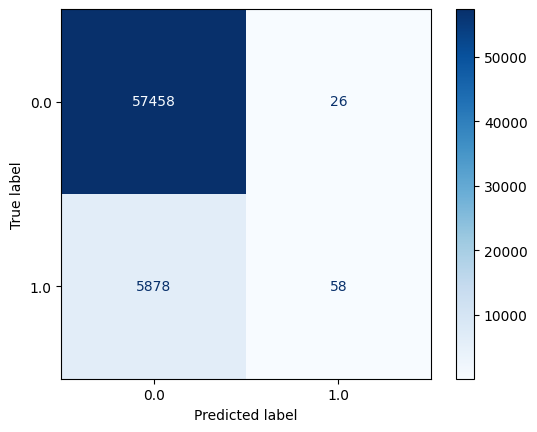

In [381]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues)

## 9. Запуск других классификаторов

## 10. Борьба с несбалансированностью классов 

## 11. Исключение коррелированных переменных 

Корреляция между количественными переменными отсутствует

## 12. Общие выводы

Для выполнении задания был использован датасет Heart Disease Health Indicators Dataset. \
Задача: прогноз риска сердечно-сосудистых заболеваний.

В ходе работы были выполнены следующие задачи:
- Описана задача
- Прочитаны данные
- Визуализированы данные и вычислены основные характеристики
- Обработаны категориальные признаки
- Проведена нормализация
- Данные разбиты на обучающую и тестовую выборки
- Запущен классификатор ближайших соседей для разных количеств
- Вычислена ошибка на обучающей и тестовой выборках - сделаны выводы

В датасете нет пропущенных значений, поэтому их не ненужно было обрабатывать. \
Так же в датасете есть несбалансированные классы (90/10 - люди без заболеваний сердца/люди c заболеванием сердца)
Количество выбросов: ~0.7%

Для решения задачи использовался классификатор ближайших соседей, причем были проведены вычисления при разном значениии параметра k - соседей. Получили, что оптимальное число соседей: 40. Ошибка на тестовой выборке при этом параметре: 0.09309366130558183, причем большая часть ошибок вида ${\rm FN}$ – false negative (для людей с заболеванием сердца предсказывает отсутствие болезни).

Данный метод классификации объектов не подходит для медицины, т.к ошибка классификации объектов достаточно большая, причем большая часть ошибок это - _промахи_.